# Washington State Electric Vehicle Population Data 

Matthew Zhang and Yang Chen

## Introduction

For our final project, we selected a dataset from data.gov that concerns the Battery Electric Vehicles and Plug-in Hybrid Electric Vehicles that are registered with Washington State's Department of Licensing. The dataset contains a total of 124,716 observations corresponding to that amount of registered electric vehicles (EVs) in the state.

In our analysis, we will utilise the K-nearest Neighbours algorithmto clustre the data and then we will perform a classification on the data in the process, with explanation on the results, accuracy, and their meaning.

We will also perform an initial analysis through descriptive statistics to get some basic information about our dataset.

The questions that we want to answer are the following:

- What is the distribution of the year of the model of the vehicles?
- Which vehicle make is most popular?
- What electric vehicle type is most common? 
- In which cities are electric vehicles most common (in Washington State specifically)?
- What is the range of the EVs used on average by model year?
- What is the correlation between electric range and model year?

Our reasons for answering the above questions is that in recent years, electric vehicles have become very popular, especially among the younger cohorts that now are of the age to begin owning vehicles. Our aim is to see if the data in a specific state matches that general trend and to see a general profile of what situations people buy EVs in and influencing factors that lead them to buy EVs. We then will extrapolate this data to a larger, national level.

# Initial Analysis: Descriptive Statistics and Visualisations

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from itertools import cycle
sns.set(style='darkgrid')

In [42]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
1,3FA6P0PU7H,Sedgwick,Derby,KS,67037.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,138214331,POINT (-97.27013 37.54531),NaN,2.017301e+10
2,1N4AZ0CP8D,Snohomish,Marysville,WA,98271.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,3129059,POINT (-122.19388 48.15353),PUGET SOUND ENERGY INC,5.306105e+10
3,WBY8P8C58K,Kitsap,Bremerton,WA,98337.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,26.0,166525635,POINT (-122.62749 47.565),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EA7K,Snohomish,Edmonds,WA,98026.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,475248315,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10


In [43]:
num_rows = df.shape[0]

print(num_rows)

118959


Now that we have our dataframe, our first order of work is to get rid of unnecessary columns. For these purposes, we decided to rid the dataframe of the columns of VIN (1-10), Postal Code, Legislative District, DOL Vehicle ID, Vehicle Location, and 2020 Census Tract. 

In [44]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
1,3FA6P0PU7H,Sedgwick,Derby,KS,67037.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,138214331,POINT (-97.27013 37.54531),NaN,2.017301e+10
2,1N4AZ0CP8D,Snohomish,Marysville,WA,98271.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,3129059,POINT (-122.19388 48.15353),PUGET SOUND ENERGY INC,5.306105e+10
3,WBY8P8C58K,Kitsap,Bremerton,WA,98337.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,26.0,166525635,POINT (-122.62749 47.565),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EA7K,Snohomish,Edmonds,WA,98026.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,475248315,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10


## Distribution of Model Year

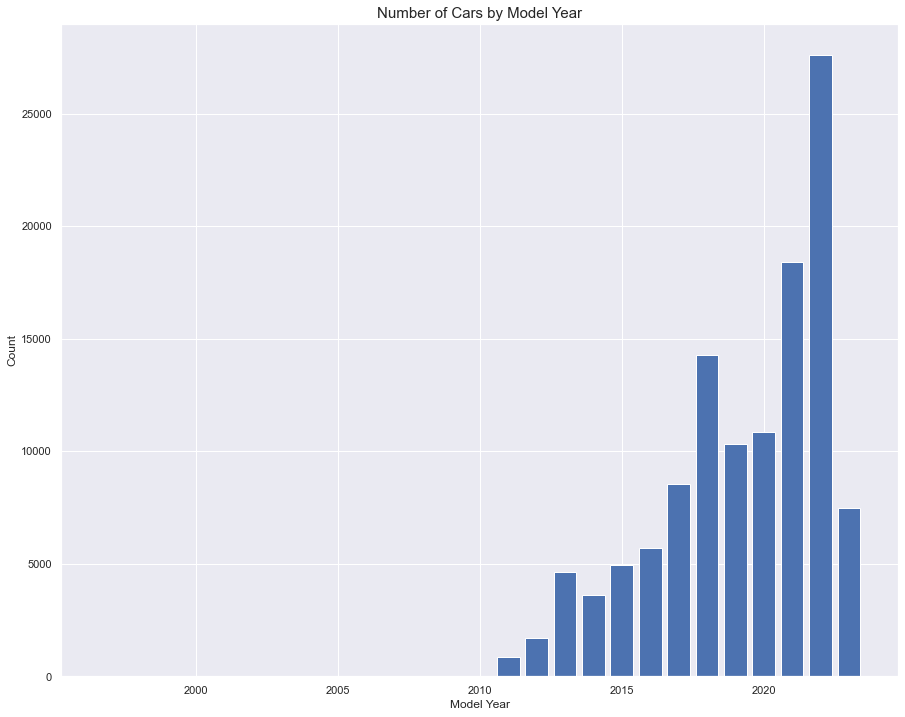

In [45]:
fig, ax = plt.subplots(figsize=(15, 12))

counts = df['Model Year'].value_counts().sort_index()

ax.bar(counts.index, counts.values)

plt.title('Number of Cars by Model Year', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

As we can see from the above bar chart the distribution is clear: the number of electric vehicles by model year clearly increases from a model year of 2011 and onwards. This indicates to us either one of two possibilities:

1. EVs became more popular in the 2010s and people usually bought new hence the large proportion of EVs with a model year of 2011-present
2. People generally tend to prefer more modern versions of EVs, likely due to their fuel efficiency (EVs early on struggled with efficiency and operating economics, especially range, due to the problem of developing a battery of suffcient size. 

## Most Common Make

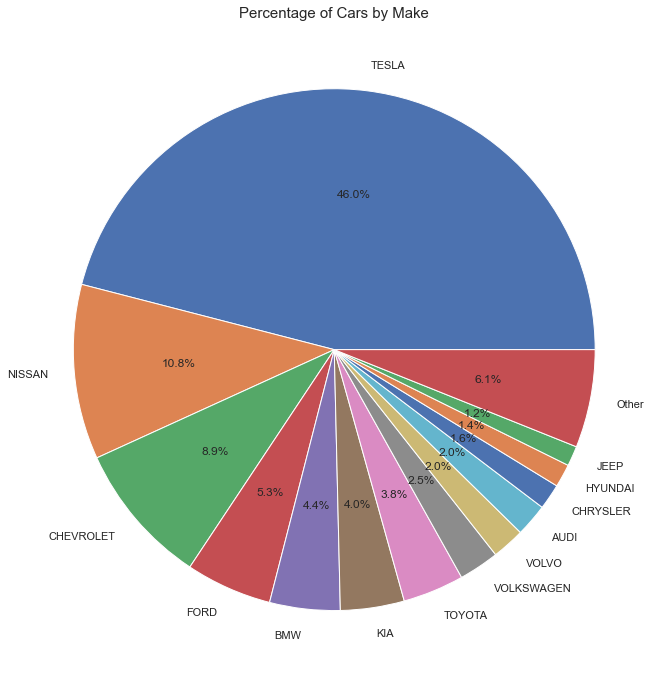

In [46]:
total_cars = len(df)

make_perc = (df['Make'].value_counts() / total_cars) * 100

other_perc = make_perc[make_perc < 1].sum()
make_perc = make_perc[make_perc >= 1]
make_perc['Other'] = other_perc

fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(make_perc, labels=make_perc.index, autopct='%1.1f%%')
ax.set_title('Percentage of Cars by Make', fontsize=15)
plt.show()

The above information confirms some general known trends in the market of electric vehicles: that Tesla is quickly becoming the most popular brand for EVs. As the data suggests above, Tesla represents by far the largest proportion of EVs registered with the Washington State DOL, accounting for well over 4 in 10 EVs in the registry. This also tracks with the previously drawn data that shows that the majority of EVs were purchased after 2011 as most Tesla models began to gain popularity somewhere around the mid to late 2010s. 

## Electric Vehicle Types

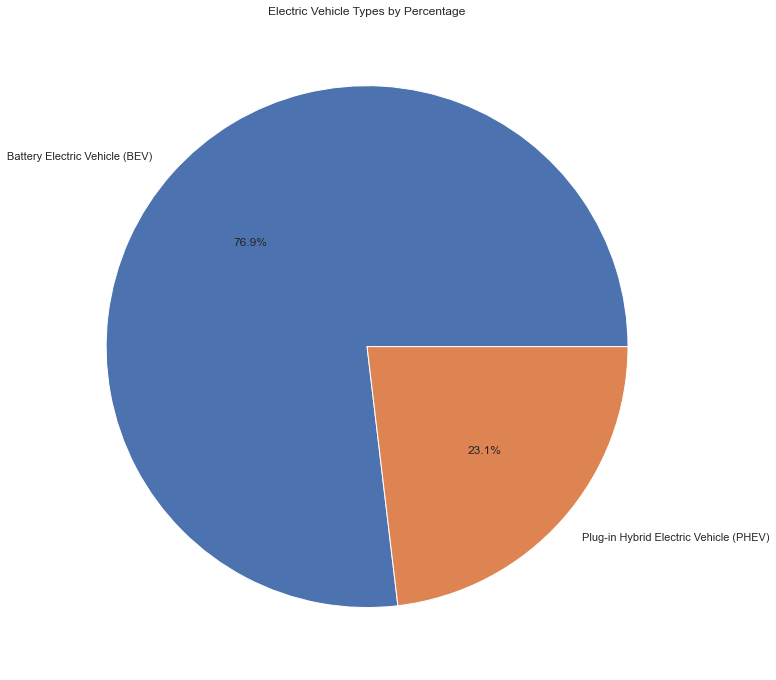

In [47]:
ev_counts = df['Electric Vehicle Type'].value_counts()

fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(ev_counts, labels=ev_counts.index, autopct='%1.1f%%')
ax.set_title('Electric Vehicle Types by Percentage')

plt.show()

From the data that we gleaned, we can observe that the vast majority of EVs in the state are of the Battery Electric Vehicle or BEV type. This makes sense as PHEVs are less common in general and are usually less efficient than BEVs.

Below, we will create an additional boxplot that shows the EV type in juxtaposition to its model year. 

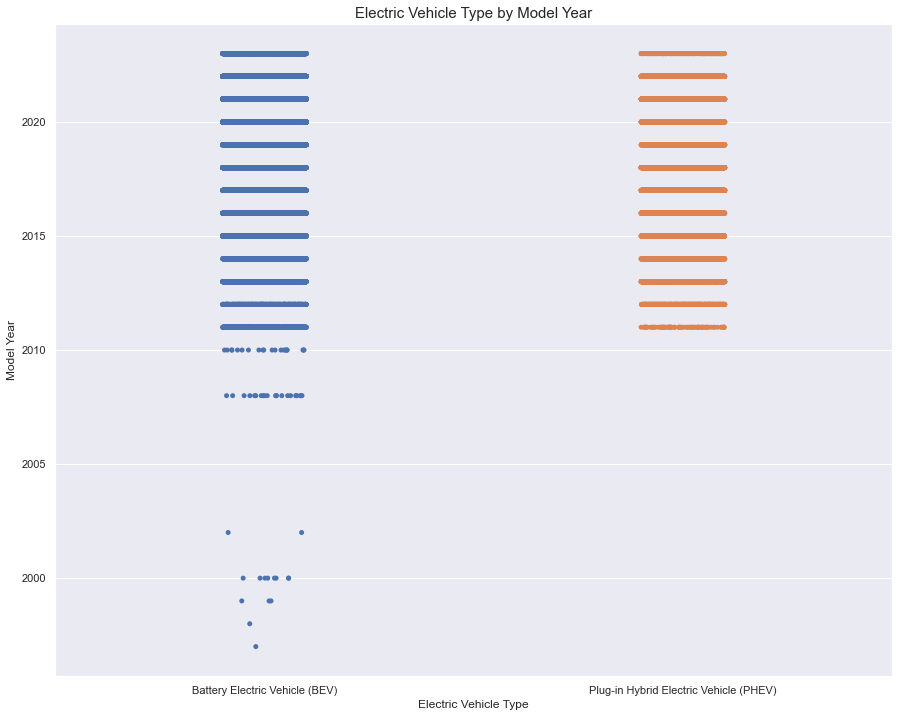

In [48]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.stripplot(x='Electric Vehicle Type', y='Model Year', data=df)

plt.title('Electric Vehicle Type by Model Year', fontsize=15)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Model Year', fontsize=12)

plt.show()

From the data above, we can see that BEVs were the first electric vehicles to be created, as prior to 2010, there were no Plug-in Hybrid Electric Vehicles (PHEV). This appears to be at least a partial explanation for the large chasm in the difference between the two EV types. 

To further investigate this discrepancy, we will plot the distribution of BEVs sold vs PHEVs since 2010, when PHEVs first appeared in the data.

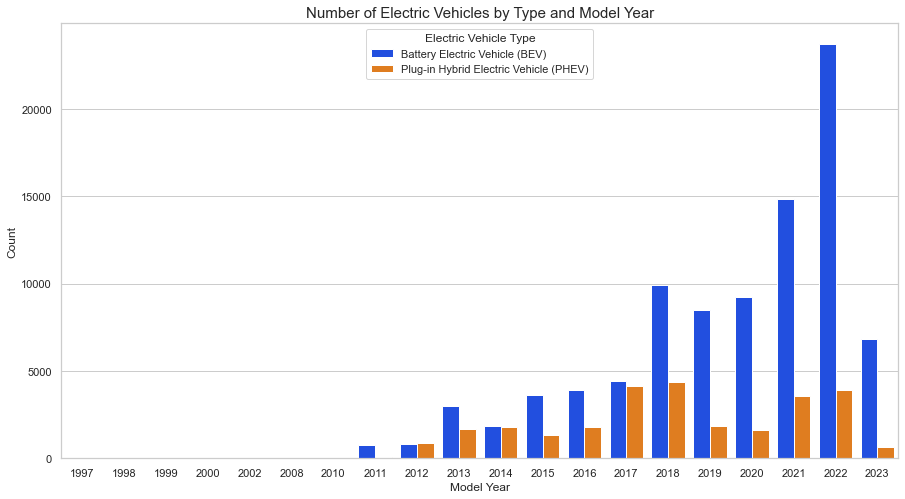

In [49]:
counts = df.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='count')

sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x='Model Year', y='count', hue='Electric Vehicle Type', data=counts, palette='bright')
plt.title('Number of Electric Vehicles by Type and Model Year', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

As we see above, we notice that aside from 2014 and 2018, PHEV sales never really quite matched up with BEV sales. the PHEV, is a vehicle that has lower upfront costs, but is often more expensive to operate in the long run. This is due mainly to the fact that they house a smaller battery. PHEVs also do not run solely on electric power and will also require the use of gas which can raise the overall cost of operating one. Both of these factors will affect the rate of purchase of PHEVs vs BEVs.

## Electric Vehicle Distribution by City in the State of Washington

In [50]:
value_counts = df['City'].value_counts()

print(value_counts)

Seattle        21259
Bellevue        6233
Redmond         4484
Vancouver       4264
Kirkland        3780
               ...  
Summerville        1
Key West           1
Lind               1
Cheyenne           1
Quinault           1
Name: City, Length: 641, dtype: int64


In [51]:
value_counts = df['State'].value_counts()

print(value_counts)

WA    118665
CA        79
VA        38
MD        26
TX        19
NC         9
CO         9
AZ         8
CT         7
IL         7
GA         7
NV         7
FL         6
SC         6
DC         5
NE         4
KS         4
NY         4
LA         4
HI         4
NJ         4
MO         3
AR         3
PA         3
MA         3
OR         3
OH         2
AL         2
ID         2
WY         2
TN         2
UT         2
KY         1
AK         1
DE         1
WI         1
MS         1
BC         1
RI         1
NH         1
MN         1
OK         1
Name: State, dtype: int64


There is a small, but statistically significant number of datapoints from outside the state of Washington so we remove those by creating a new dataframe that includes only rows where the state is "WA". 

In [52]:
wa_df = df[df['State'] == 'WA']

wa_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,1N4AZ0CP8D,Snohomish,Marysville,WA,98271.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,3129059,POINT (-122.19388 48.15353),PUGET SOUND ENERGY INC,5.306105e+10
3,WBY8P8C58K,Kitsap,Bremerton,WA,98337.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,26.0,166525635,POINT (-122.62749 47.565),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EA7K,Snohomish,Edmonds,WA,98026.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,475248315,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10
5,1G1FZ6S07L,Walla Walla,Walla Walla,WA,99362.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,16.0,150312991,POINT (-118.34261 46.07068),PACIFICORP,5.307192e+10
6,KNDCC3LG1L,Snohomish,Everett,WA,98204.0,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,21.0,152471728,POINT (-122.25527 47.90456),PUGET SOUND ENERGY INC,5.306104e+10


In [53]:
value_counts = wa_df['City'].value_counts()

print(value_counts)

Seattle        21259
Bellevue        6232
Redmond         4484
Vancouver       4264
Kirkland        3780
               ...  
Hatton             1
Vantage            1
Danville           1
Clallam Bay        1
Quinault           1
Name: City, Length: 446, dtype: int64


As we see above, we reduced the number of unique cities in the dataframe from 650 to 449 just by excluding non-Washington cities.

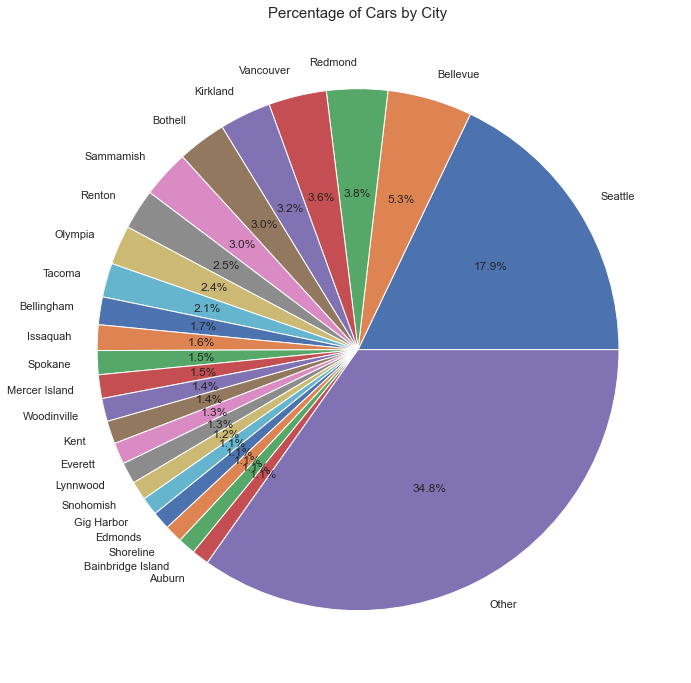

In [54]:
total_cars = len(wa_df)

make_perc = (wa_df['City'].value_counts() / total_cars) * 100

other_perc = make_perc[make_perc < 1].sum()
make_perc = make_perc[make_perc >= 1]
make_perc['Other'] = other_perc

fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(make_perc, labels=make_perc.index, autopct='%1.1f%%')
ax.set_title('Percentage of Cars by City', fontsize=15)
plt.show()

Per the data above, we see that Seattle is the leading city among EV owners in the state of Washington. This is unsurprsing given the trend of EVs in the United States as a whole and the enviroments that EV owners usually live in notably that:

1. EV owners generally tend to live in larger cities where traffic means that EVs give dramatic savings in terms of energy (Tesla especially afford a lot of battery level savings in cities vs on long trips for instance).
2. EV owners also largely tend to be congregated on the West Coast of the United States (most notably in California). This is due to a few factors:
    a. Cities west of the Mississippi and West Coast cities in particular are known for being spread out and their urban sprawl. This makes EVs particularly efficient as in a city environment they can go a long time without charging due to battery being saved in cities
    b. West Coast cities generally have among the worst public transit systems in the United States, owing to being built later on. This makes cars the more attractive mode of transport and makes EVs attractive to owners of automobiles.
    
Another important nugget of information that we gain from the above pie chart is that a lot of the other cities with significant portions of EV owners such as Bellevue, Redmond, Kirkland, Bothell, and Sammamish are located in suburbs of Seattle (Vancouver is a suburb to the north of Portland). EVs are also very attractive to those residing in suburbs due to their long commutes (usually in traffic) to the city and also the distance that these suburban commuters have to travel to get where they want to go. It also helps that these areas are usually shorter in supply of gas stations, making EVs all the more attractive to these residents. 

## Range by Model Year

In order to fill out the Range by Model Year, we decided to include only the models that had Clean Alternative Fuel Vehicle (CAFV) Eligibility. This way we could better weed out outliers in terms of Electric Range. 

In [55]:
filtered_df = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Not eligible due to low battery range']

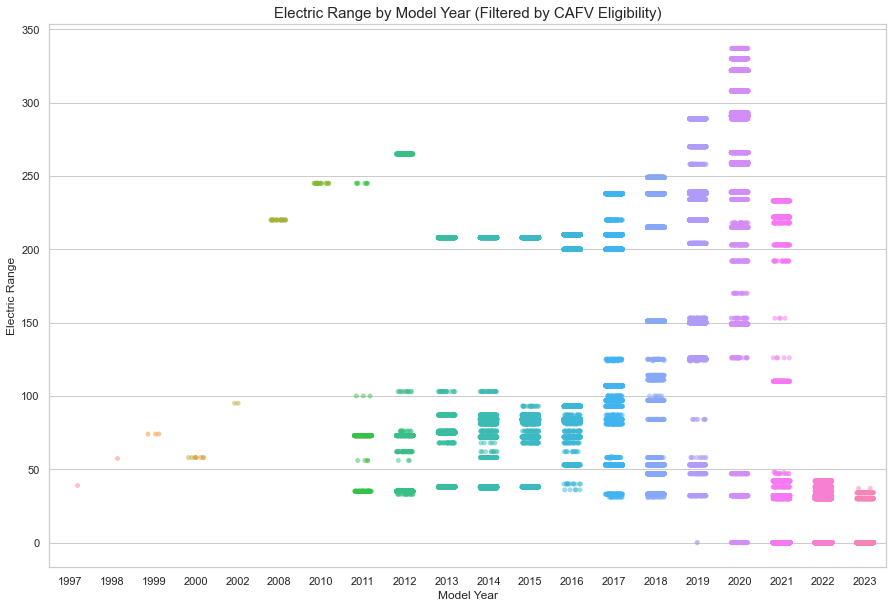

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(x='Model Year', y='Electric Range', data=filtered_df, jitter=0.2, alpha=0.5)

plt.title('Electric Range by Model Year (Filtered by CAFV Eligibility)', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range', fontsize=12)

plt.show()

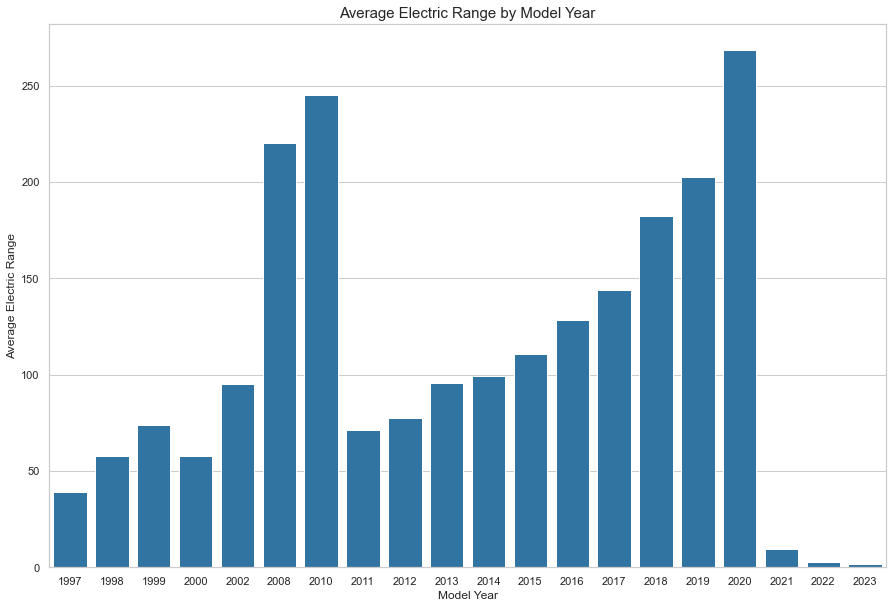

In [57]:
df_grouped = filtered_df.groupby('Model Year')['Electric Range'].mean().reset_index()

# Create bar chart
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='Model Year', y='Electric Range', data=df_grouped, color='#1f77b4')
ax.set_title('Average Electric Range by Model Year', fontsize=15)
ax.set_xlabel('Model Year', fontsize=12)
ax.set_ylabel('Average Electric Range', fontsize=12)

plt.show()

If we examine the data above, we notice a most peculiar trend: the range of EVs tends to increase by year until 2021, where it suddenly plummets from well over 250 to under 10. This is almost certainly due to a data error or some type of error in entering the data, however, the non-averaged data also paints a similar picture. It seems highly unlikely, however, that the average range would drop so sharply in such a short amount of time so it's most likely that this is a data entry error.

## K-Nearest Neighbour Algorithms: Visualisations

After our initial analysis via descriptive statistics, we will now perform our analysis of labels that we want to explore. For this exercise, we will juxtapose the Electric Range variable with the Base MSRP (Manufacturer's Suggested Retail Price) variable and the Model Year. The algorithm that we will utilise will be the K-Nearest Neighbour or KNN algorithm.

## Visualisation 1 - Range vs Base MSRP

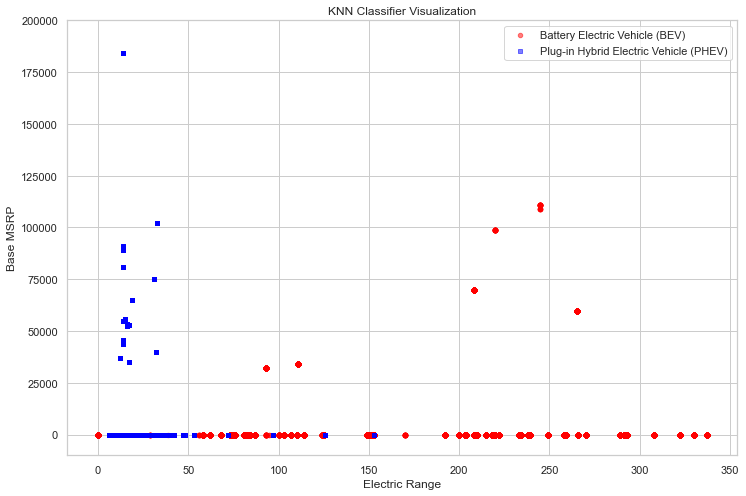

In [58]:
plot_data = data[['Electric Range', 'Base MSRP', 'Electric Vehicle Type']]

colors = {'Battery Electric Vehicle (BEV)': 'red', 'Plug-in Hybrid Electric Vehicle (PHEV)': 'blue'}
markers = {'Battery Electric Vehicle (BEV)': 'o', 'Plug-in Hybrid Electric Vehicle (PHEV)': 's'}

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(12, 8)) # Set the figure size to 12x8 inches

for ev_type, group in plot_data.groupby('Electric Vehicle Type'):
    group.plot(ax=ax, kind='scatter', 
               x='Electric Range', y='Base MSRP', 
               label=ev_type, color=colors[ev_type], 
               marker=markers[ev_type], alpha=0.5)

plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('KNN Classifier Visualization')
plt.ylim(-10000, 200000)
plt.legend()
plt.show()

From the KNN Classifier Visualisation shown above we can gain the following insights into our two classifiers:

1. There is a clear correlation between Electric Range and the type of electric vehicle: Battery Electric Vehicles generally tend to have more electric range than Plug-in Hybrid Electric Vehicles. 
2. A lot of our data has an MSRP of 0, we can infer this is because of a couple of reasons:
    a) The manufacturer did not suggest an MSRP - since the MSRP is only a manufacturer's suggested retail price, it is certainly plausible that some manufacturers do not specify an MSRP. This can be a reasonable explanation of why a significant portion of the data has an MSRP of 0.
    b) There was an issue with data entry - another plausible reason for why there is an MSRP of 0 on so many vehicles could be that manufacturers simply forgot to include the MSRP.
    c) Information not given to the DOL - since the DOL only lists the record of electric vehicles in the state, it is likely that the MSRP was not required to be given to the DOL as it doesn't really hold any importance with regards t governmental purposes. It is also plausible that some people simply did not recall the MSRP of their vehicle or did not know the MSRP.
3. Of the vehicles that do have MSRPs given, it is seen that there are more instances of MSRP > 0 among PHEV owners than BEV owners. This is likely just an instance of correlation not being related to causation. The small dataset makes it hard to make any definitive claims but we can infer that generally speaking, there will be some outliers. Overall however, most EVs (regardless of whether they are BEVs or PHEVs) generally seem to bein the same ballpark of $50,000 to $100,000 in MSRP if the given MSRP is > 0. PHEVs also have a fair number of values in the $25,000 to $50,000 MSRP range.

## Visualisation 2 - Electric Range vs Model Year

In [59]:
features = ['Model Year', 'Electric Range']
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

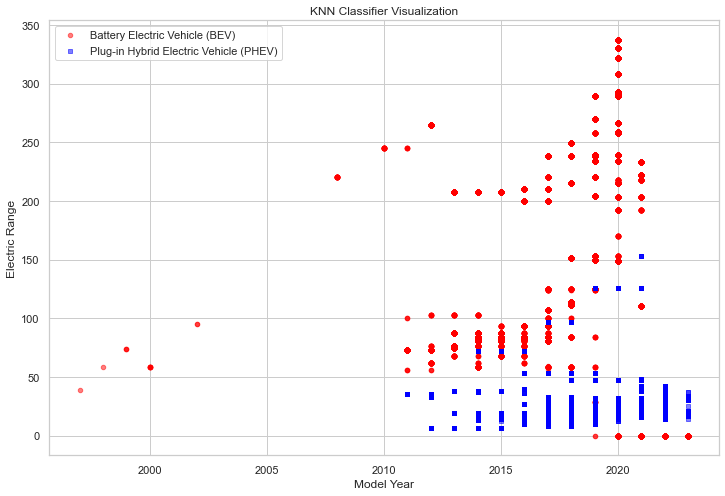

In [60]:
plot_data = data[['Model Year', 'Electric Range', 'Electric Vehicle Type']]

colors = {'Battery Electric Vehicle (BEV)': 'red', 'Plug-in Hybrid Electric Vehicle (PHEV)': 'blue'}
markers = {'Battery Electric Vehicle (BEV)': 'o', 'Plug-in Hybrid Electric Vehicle (PHEV)': 's'}

fig, ax = plt.subplots(figsize=(12, 8))

for ev_type, group in plot_data.groupby('Electric Vehicle Type'):
    group.plot(ax=ax, kind='scatter', x='Model Year', y='Electric Range', label=ev_type, color=colors[ev_type], marker=markers[ev_type], alpha=0.5)

plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('KNN Classifier Visualization')
plt.legend()
plt.show()

Based of the KNN Classifier Visualisation obtained above, we can conclude that:

1. There was a clear spike in the number of EVs with a Model Year > 2010
    a) PHEVs only have model years post 2010, most likely indicating that the technology that has allowed for PHEVs is relatively recent
2. BEVs have incidences as early as the mid 1990s, however their rangeis clearly much better in models that were from years post 2010
3. PHEVs appear to lag significantly behind when it comes to range. 

## Classification

The next order of work that we will get to is to perform a classification of the data. For this, we decided to include the variable Legislative District. We will use this to test the accuracy of our predictive algorithm. 

In [61]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

numeric_data = data.select_dtypes(include=['number'])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

features = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']
X = data[features]

y = data['Electric Vehicle Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier and fit the data
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Output the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[27336   119]
 [   31  8202]]

Classification Report:
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00     27455
Plug-in Hybrid Electric Vehicle (PHEV)       0.99      1.00      0.99      8233

                              accuracy                           1.00     35688
                             macro avg       0.99      1.00      0.99     35688
                          weighted avg       1.00      1.00      1.00     35688



## Classification Interpretation

Now we will interpret our results from the above output. The classification report consists of a portion containing a Confusion Matrix, which is a summary of the number of datapoints predicted correctly and the number of datapoints predicted inaccurately. The other portion consists of the Classificaton Report, which uses four metrics precision, recall, f1-score, and support, to determine the classifiers' performance. 

### Part 1 - Confusion Matrix

Interpreting the Confusion Matrix is fairly simple:

- There were 27,336 Battery Electric Vehicles predicted correctly.
    - 119 were incorrectly classified as Plug-in Electric Vehicles.
- There were 8,202 instances of Plug-in Electric Vehicles being predicted correctly.
    - 31 were false classified as Battery Electric Vehicles.
    
### Part 2 - Classification Report

To interpret the Classification Report we must first define the metrics that are used:

Precision - out of all datapoints predicted as positive, how many were actually positive
Recall - out of all actual positive datapoints, how many did the model predict as positive
F1-score - harmonic mean of precision and recall
Support - number of actual occurrences

For f1-score, precision, and recall, the range of the scores of these three metrics is from 0 to 1. 0 being a very poor classification model and 1 being very good. For both the Battery and Plug-in Hybrid Electric Vehicle types, the recall, precision, an f1-score are at least 0.99. 

The conclusion that we can draw from the Classification Report is that, put bluntly, our classification did a very good job of predicting the type of Electric Vehicle it was examining (BEV or PHEV).

# Conclusion

We have now reached the end of our dataset analysis and visualisation of the dataset of all electric vehicles registered with the State of Washington Department of Licensing. Through the data we have cleaned, classified, and visualised, we can make the following definitive conclusions about our data:

- Under the department, we notice that there is a clear upward tren in the Model Year of electric vehicles registered. This affirms a trend that we have long noticed: a sharp increase in the purchases of EVs since the 2010s and a significant correlation with the advent of Tesla vehicles. 
    - A compounding factor of this is the fact that EVs that were produced in more recent years have longer ranges where they can run solely on battery power. This can be attractive to buyers since they can forgo gas almost entirely, which leads to huge savings. There is a downside however, which is that EVs generally do not have the range that gas powered cars do in totality (and even a number of PHEVs), which makes them unattractive to those who travel longer distances.
    - An additional factor in why so many more EVs were purchased in recent years is the advent of Tesla. The sale and especially production of Tesla vehicles increased dramatically in 2018 and the company reached around 72% of total EV market share in 2022. Given that Tesla accoutns for around 46% of all EVs registered under the DOL, it is almost certain that the massive increase in production of Tesla vehicles (which were almost all EVs) had a significant and noticeable effect on the data.
- Battery Electric Vehicles are significantly more popular than Plug-in Electric Vehicles. This can be due to a number of confunding factors:
    - Firstly, BEVs were the only EV really produced before 2010 that show up in the DOL registry. This is confirmed by additional information we searched, which suggests that interest in PHEVs increased during the 2000s due to rising gas prices. Additonally, our supplemental research found that most PHEVs began to only really affect the market in the early 2010s, which ties in nice with when they make an appearance in our dataset
    - In addition to PHEVs only really becoming mass produced starting in the early 2010s, there is also the factor of BEVs providing a number of cost advantages. Since BEVs run solely on electric power while PHEVs run on electric power and gas, BEVs have a cost advantage because charging is significantly cheaper than fueling a gas car. Most PHEVs also can't run significant distances on solely battery power, which further increases their costs. PHEVs are also more expensive than their BEV counterparts (and also gas cars of the same variant) which further reduces their attractiveness.
- Most of the owners of EVs in the state of Washington reside in cities or in the suburbs of cities. This also adds up and correlates well with what we currently know about EVs and their cost advantage to the consumers
    - While a large number of BEVs can run a fair distance (up to just under 340 miles from the highest range in our dataset), the average is still significantly lower. This matches up very unfavourably when we examine the data for gas cars in totality, which on average run a range of around 400 miles with the longest ranges extending over 700. This provides two challenges to EV owners:
        1. EV owners usually cannot travel long distances with EVs, owing to the reduced range of EVs and the relative rarity of EV charging stations relative to gas stations.
        2. Due to shorter ranges and fewer charging stations, EV owners have to be in close proximity to charging stations at almost all times when travelling a significant distance.
        3. Even at superchargers, EVs can take a significantly longer time to charge to the capacity needed to last until the next charging stop versus gas cars, which can fuel all the way to full in less time than it takes for an EV to charge to the necessary amount of power needed to continue on its journey.
    - The above factors make it so that owning an EV in a rural area or a less built up area is much less desirable. For one, EVs will not be able to travel long distances without wasting the owner time charging. Additionally, there may not even be a charging station within a reasonable distance from one's place of residence. 
    - Another factor that gives EVs significant advantages in cities and in built up areas around cities is that unlike gas cars, EVs save fuel (battery power) by operating in environments where the speeds are lower. This means that EVs save energy in traffic and driving at slow speeds whereas gas cars are usually much more efficient when running at high speeds with little to no stopping. This, coupled with a relative abundance of charging stations in cities, makes it a lot easier for EV owners in cities to make the investment cost effective, especially in West Coast cities and cities west of the Mississippi that have poor public transit options. 
- EV ranges have generally increased with time however still wildly vary. There was a noticeable outlier from 2021-2023 in our dataset concerning average EV range, however we suspect a data entry error in this situation.
- The classification method and KNN visualisation we utilised to classify our data was extremely accurate at predicting the type of electric vehicle being operated. It should be noted, though, that the classification we used was a relatively simple and basic classification that did not involve many confunding variables.